In [1]:
import pandas as pd
import numpy as np

In [2]:
oneday=pd.read_csv('input/oneyear2.csv')

In [3]:
oneday.head()

,Unnamed: 0,MTS,VOLUME,OPEN2,OPEN3,OPEN4,OPEN5,OPEN6,OPEN7,OPEN8,OPEN1
0,399,2016-11-13 16:00:00,6011.546517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.134616
1,398,2016-11-14 16:00:00,7936.330432,-0.134616,NaN,NaN,NaN,NaN,NaN,NaN,-0.134409
2,397,2016-11-15 16:00:00,17948.506714,-0.134409,-0.134616,NaN,NaN,NaN,NaN,NaN,-0.134163
3,396,2016-11-16 16:00:00,14889.308747,-0.134163,-0.134409,-0.134616,NaN,NaN,NaN,NaN,-0.132381
4,395,2016-11-17 16:00:00,6962.710857,-0.132381,-0.134163,-0.134409,-0.134616,NaN,NaN,NaN,-0.132649


In [4]:
train=oneday.values[10:350]
test=oneday.values[350:390]

In [5]:
train_X=train[:,2:10]
test_X=test[:,2:10]

In [6]:
train_Y=train[:,10]
test_Y=test[:,10]

In [23]:
train_X=train_X.reshape(-1,8,1)
train_Y=train_Y.reshape(-1,1)

In [30]:
test_X=test_X.reshape(-1,8,1)
test_Y=test_Y.reshape(-1,1)

In [7]:
import time
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import time
import warnings
import keras
from numpy import newaxis
from keras.layers.core import Dense, Activation, Dropout
from keras.models import Sequential
import matplotlib.pyplot as plt
%matplotlib inline

Using Theano backend.


In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error

In [9]:
np.set_printoptions(threshold=np.nan)

In [28]:
def LSTM8():
    model = Sequential()
    # model.add(LSTM(units=4,input_shape=(input_dim,step)))
    model.add(LSTM(
            16,input_dim=1,input_length=8,stateful=False,return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(
            32,stateful=False,return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(16,kernel_initializer="uniform",activation='relu')) 
    model.add(Dense(1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [29]:
model=LSTM8()
model.fit(train_X,train_Y,batch_size=32,epochs=100,validation_split=0.1,verbose=1)

/Users/xiangyuanren/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  """
/Users/xiangyuanren/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(16, stateful=False, return_sequences=True, input_shape=(8, 1))`
  """


Train on 306 samples, validate on 34 samples
Epoch 1/100
306/306 [==============================] - 0s 223us/step - loss: 0.0064 - val_loss: 0.0268
Epoch 2/100
306/306 [==============================] - 0s 183us/step - loss: 0.0041 - val_loss: 0.0280
Epoch 3/100
306/306 [==============================] - 0s 178us/step - loss: 0.0040 - val_loss: 0.0262
Epoch 4/100
306/306 [==============================] - 0s 183us/step - loss: 0.0037 - val_loss: 0.0281
Epoch 5/100
306/306 [==============================] - 0s 185us/step - loss: 0.0035 - val_loss: 0.0254
Epoch 6/100
306/306 [==============================] - 0s 175us/step - loss: 0.0031 - val_loss: 0.0234
Epoch 7/100
306/306 [==============================] - 0s 188us/step - loss: 0.0028 - val_loss: 0.0156
Epoch 8/100
306/306 [==============================] - 0s 176us/step - loss: 0.0020 - val_loss: 0.0119
Epoch 9/100
306/306 [==============================] - 0s 180us/step - loss: 0.0011 - val_loss: 0.0070
Epoch 10/100
306/306 [======

306/306 [==============================] - 0s 180us/step - loss: 1.0564e-04 - val_loss: 0.0013
Epoch 77/100
306/306 [==============================] - 0s 185us/step - loss: 1.1066e-04 - val_loss: 0.0013
Epoch 78/100
306/306 [==============================] - 0s 184us/step - loss: 1.2158e-04 - val_loss: 0.0011
Epoch 79/100
306/306 [==============================] - 0s 188us/step - loss: 1.1064e-04 - val_loss: 0.0013
Epoch 80/100
306/306 [==============================] - 0s 188us/step - loss: 1.1558e-04 - val_loss: 0.0012
Epoch 81/100
306/306 [==============================] - 0s 192us/step - loss: 1.2426e-04 - val_loss: 0.0012
Epoch 82/100
306/306 [==============================] - 0s 182us/step - loss: 1.2942e-04 - val_loss: 0.0011
Epoch 83/100
306/306 [==============================] - 0s 190us/step - loss: 1.0938e-04 - val_loss: 0.0013
Epoch 84/100
306/306 [==============================] - 0s 184us/step - loss: 1.0341e-04 - val_loss: 0.0013
Epoch 85/100
306/306 [===================

In [31]:
trainPredict = model.predict(train_X)
testPredict = model.predict(test_X)

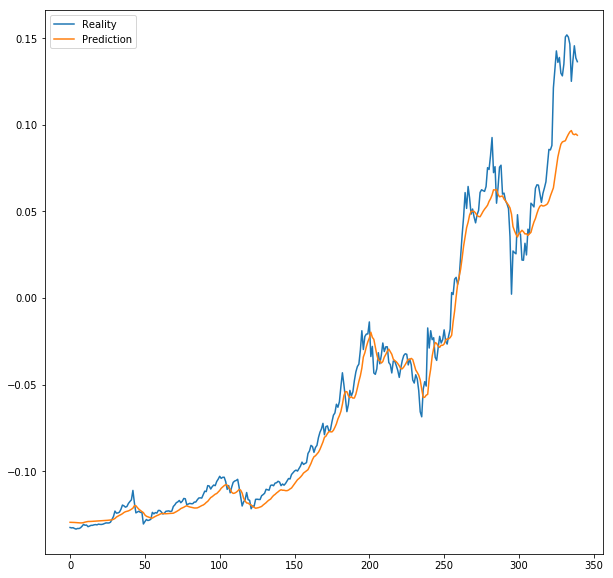

In [32]:
plt.figure(figsize=(10,10)) 
l1,=plt.plot(train_Y[:])
l2,=plt.plot(trainPredict[:])
plt.legend(handles = [l1, l2,], labels = ['Reality', 'Prediction'], loc = 'best')
#plt.plot(testPredictPlot)
plt.show()

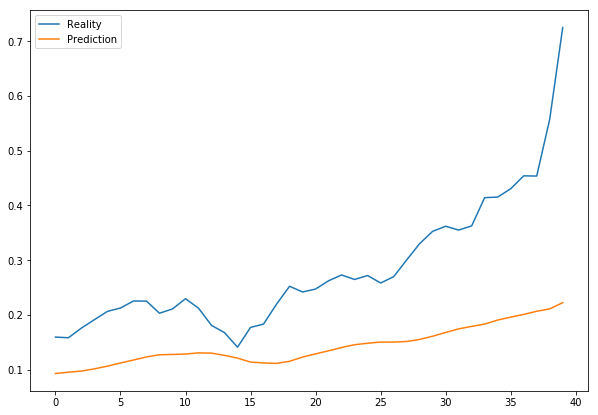

In [34]:

plt.figure(figsize=(10,7)) 
l1,=plt.plot(test_Y[:])
l2,=plt.plot(testPredict[:])
plt.legend(handles = [l1, l2,], labels = ['Reality', 'Prediction'], loc = 'best')
#plt.plot(testPredictPlot)
plt.show()

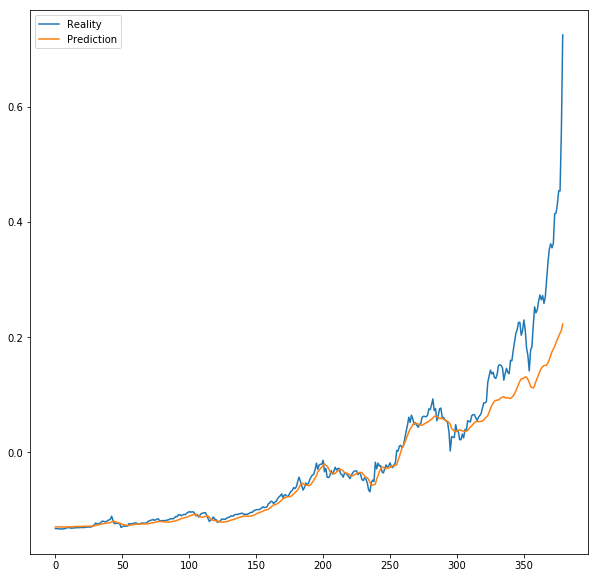

In [49]:
plt.figure(figsize=(10,10)) 
l1,=plt.plot(np.concatenate((train_Y,test_Y),axis=0))
l2,=plt.plot(np.concatenate((trainPredict,testPredict),axis=0))
plt.legend(handles = [l1, l2,], labels = ['Reality', 'Prediction'], loc = 'best')
#plt.plot(testPredictPlot)
plt.show()

In [52]:
import math
trainScore = math.sqrt(mean_squared_error(train_Y, trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(test_Y, testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.01 RMSE
Test Score: 0.17 RMSE
